# Introducrtion to Machine Learning: Assignment #2
## Submission date: 21\02\2024, 23:59.
### Topics:
- Perceptron
- Logistic Regression
- Gradient Descent
- SVM
- Kernels

**Assignment Instruction:**

· Submissions in pairs only.

· The code must be reasonably documented

· Try to keep the code as clean, concise, and short as possible

· Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to disciplinary actions.

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).

<b>Note:</b> Pay attention to the labels in the the different datasets (0/1) and that some of the learned algorithms work with labels (-1/1).

## Question 1 - Logistic regression

You will implement a claaisifer to predict wether client will buy a SUV car or not. <br/>
The prediction will be done by the client's age, gender and salary. <br/>
The label is 1 when bought and 0 otherwise.

import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plotting function

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot(data, labels, w, bias):

  a, b, c = w[0], w[1], w[2]
  d = bias

  # create a 3D scatter plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='coolwarm')

  xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))
  z = (-a * xx - b * yy - d) * 1.0 / c

  ax.plot_surface(xx, yy, z, alpha=0.4)
  ax.azim += 30
  ax.elev += 10
  #ax.view_init(elev=0, azim=90, roll=45)

  # customize the plot
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  plt.title('3D Scatter Plot with 2D Labels')
  plt.show()

Read the dataset and visualize it

In [ ]:
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw2/suv_data.csv')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


After looking at the data, drop irrelevant features (such that have no learnability meaning) and make sure your remaining features are numeric.



In [ ]:
# drop user id colomn
df.drop(['User ID'], axis=1, inplace=True)
Y = df.Purchased # Target variabl
# Removing target variable from training data
df.drop(['Purchased'], axis=1, inplace=True)
# Select numeric columns only
#change gender to numeric
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
X = df[numeric_cols].copy()
print("Shape of input data: {} and shape of target variable: {}".format(X.shape, Y.shape))
pd.concat([X, Y], axis=1).head() # Show first 5 training examples

Shape of input data: (400, 3) and shape of target variable: (400,)


,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


Plot on the densities of the features, choose the scaler we will be
using.<br/>
<font color='green'>We decided to use StandardScaler, as we learned in class StandardScaler better suited for this type of database. Using StandardScaler improves the accuracy of the results. </font>

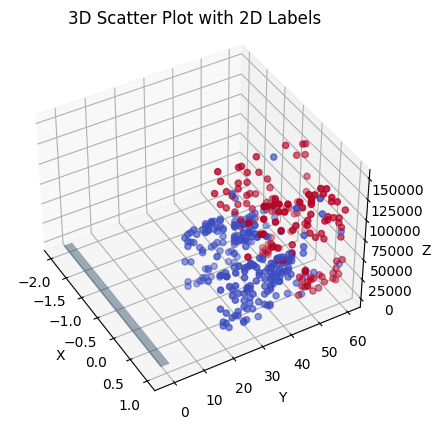

In [ ]:
from sklearn.model_selection import train_test_split
plot(X.values,Y.values,[1,1,1],0)

Split the data into 80% train samples and 20% test samples, with random state 42. <br/>
Split the train into real train (70%) and validation (30%) with random state 42. <br/>
Apply the scaler on the train, validation and test sets. <br/>
Remember: when scaling the test, it should use all the training data.<br/>
Tip: For minimizing the loss function, what labels did we look at? Are they the same here?

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
#applying standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Implement the function Logistic_Regression_via_GD(P,y,lr):
-	Input: an np array ‘P’ of ‘n’ rows and ‘d’ columns, a label vector ‘y’ of ‘n’ entries and learning rate parameter ‘lr’.
-	Output: The function computes the output vector ‘w’ (and ‘b’) which minimzes the logistic regression cost function on ‘P’ and ‘y’. <br/>

The implementation should be fully yours. Don't use library implementation! <br/>
It should be done by implementing Gradient descent (with ‘lr’ as the learning rate) to solve logistic regression. <br/>

Tip: The gradients may be large, you can use $\frac{1}{n}\nabla{L}$ (which is the true empirical loss' gradient)



In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

# For now, ignore the lambda, you will need it later
def Logistic_Regression_via_GD(P,y,lr,lamda):
    n, d = P.shape
    w = np.zeros(d)
    b = 0
    max_itr=10000
    prev_loss=0
    for i in range(max_itr):
        # Forward pass
        sig = sigmoid(np.dot(P, w) + b)

        # Error calculation
        error = sig - y

        # Gradient computation
        weight_gradients = (1 / n) * np.dot(P.T, error) + (lamda / n) * w
        bias_gradient = (1 / n) * np.sum(error)

        # Parameter update
        w -= lr * weight_gradients
        b -= lr * bias_gradient

        #calculates the loss using the cross-entropy loss function.
        loss = (-1/n) * np.sum(y * np.log(sig) + (1 - y) * np.log(1 - sig)) + (lamda/(2*n)) * np.sum(w**2)
        #stops the loop if the difference between the previous and current loss is less than 0.0001.
        if abs(prev_loss - loss) < 0.0001:
            break
        prev_loss = loss

    return w, b

Implement the function Predict(w,b,p):
-	Input: an input vector x which represents a sample, a vector (numpy) ‘w’ and a number ‘b’.
-	Output: the class prediction for ‘p’ of the logistic regression model defined by ‘w’ and ‘b’.

Note: It is your choice if use predictions of 1/-1 or 1/0. Make sure to adjust your choice to the true labels (for comparison).

In [ ]:
def predict(x,w,b):
    z = np.dot(x, w) + b
    p = sigmoid(z)
    return p

Call ‘Logistic_Regression_via_GD(P,y,lr)’, where ‘P’ and ‘y’ are the training data and the corresponding labels. <br/>
Try to find the best lr for the learning task.
<font color='green'> In general, a lower learning rate results in higher accuracy but also increases the run time and cost. After testing several options for the learning rate, we concluded that all values between 0 and 1 gave same result so we choose 0.5 lr.

In [ ]:
w, b = Logistic_Regression_via_GD(X_train, y_train,0.5,0)

Run the model on the test data, print the accuracy and plot hyperplane on the <u>test data</u> using ‘plot’ as defined above.

Accuracy:  0.8875


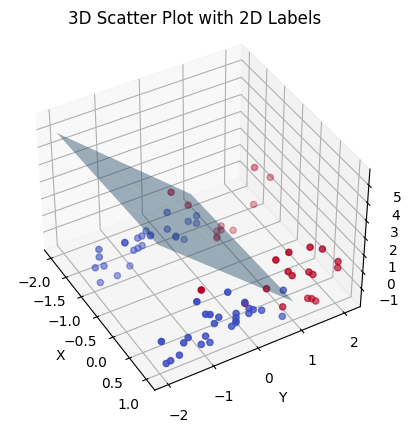

In [ ]:
y_pred = predict(X_test, w, b)
y_pred = np.where(y_pred > 0.5, 1, 0)
accuracy = np.mean(y_pred == y_test)
print("Accuracy: ", accuracy)
plot(X_test, y_test, w, b)

To improve generalization, we use a tool that is called regularization. <br/>
In simple words,
$L_{\text{loss}}(w)=L_{\text{logistic-reg}}(w)+λ⋅‖w‖^2$. <br/>
Change ‘Logistic_Regression_via_GD’ according to that loss and find the best hyperparameter $λ$ using the performance on the <u>validation</u>.


In [ ]:
lamads = np.arange(0, 5, 0.1)
for lamda in lamads:
  #Solve logistic regression with lamda
  w, b=Logistic_Regression_via_GD(X_train, y_train, 0.1,lamda)
  y_pred = predict(X_test, w, b)
  y_pred = np.where(y_pred > 0.5, 1, 0)
  accuracy = np.mean(y_pred == y_test)
  print(f"Valdation accuracy for lamda={lamda:.2f}: {accuracy * 100}%")

Valdation accuracy for lamda=0.00: 88.75%
Valdation accuracy for lamda=0.10: 88.75%
Valdation accuracy for lamda=0.20: 88.75%
Valdation accuracy for lamda=0.30: 88.75%
Valdation accuracy for lamda=0.40: 88.75%
Valdation accuracy for lamda=0.50: 88.75%
Valdation accuracy for lamda=0.60: 88.75%
Valdation accuracy for lamda=0.70: 90.0%
Valdation accuracy for lamda=0.80: 90.0%
Valdation accuracy for lamda=0.90: 90.0%
Valdation accuracy for lamda=1.00: 90.0%
Valdation accuracy for lamda=1.10: 90.0%
Valdation accuracy for lamda=1.20: 90.0%
Valdation accuracy for lamda=1.30: 90.0%
Valdation accuracy for lamda=1.40: 90.0%
Valdation accuracy for lamda=1.50: 90.0%
Valdation accuracy for lamda=1.60: 88.75%
Valdation accuracy for lamda=1.70: 88.75%
Valdation accuracy for lamda=1.80: 88.75%
Valdation accuracy for lamda=1.90: 88.75%
Valdation accuracy for lamda=2.00: 88.75%
Valdation accuracy for lamda=2.10: 88.75%
Valdation accuracy for lamda=2.20: 88.75%
Valdation accuracy for lamda=2.30: 88.75%
V

Print final test accuracy

In [ ]:
w, b=Logistic_Regression_via_GD(X_train, y_train, 0.1,3.20)
y_pred = predict(X_test, w, b)
y_pred = np.where(y_pred > 0.5, 1, 0)
accuracy = np.mean(y_pred == y_test)
print(f"Test accuracy: {accuracy * 100}%")

Test accuracy: 88.75%


## Question 2 - SVM

You are given dataset for binary classification in 2D and aim to build the best SVM classifier.

import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

load npy file

In [ ]:
import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

load the data

In [ ]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw2/svm_data_2d.npy')

# Access the data as needed
X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_val = data_dict['X_val']
y_val = data_dict['y_val']

Look at the plot of the training data. <br/>
What _geometric_ shape could (almost) perfectly separate the data?<br/>
<font color='green'>After analyzing the training data plot, it appears that an ellipse is the most suitable shape for separating the data points.</font>

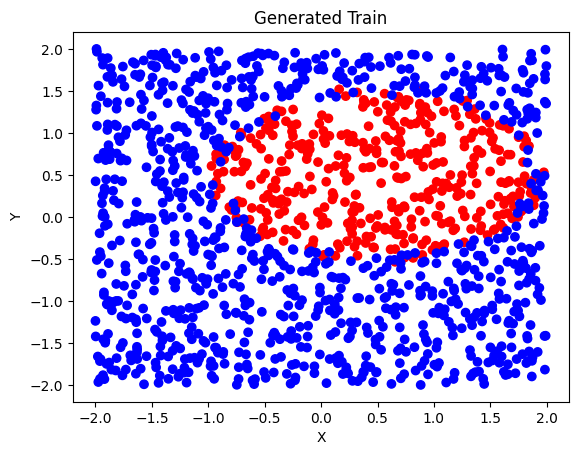

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Train')
plt.show()

Now, we want to separate the data using ellipsoid. <br/>
Its equation is:
$$Ax^2+By^2+Cx+Dy+e=0$$
Based on that equation, construct a mapping function into 4d space, such that the problem will become a linear ($w^t ϕ(x)+e=0$). <br/>
After the mapping, learn a linear classifier and print the hyperplane equation.<br/>
Note: after getting an output, I would recommend you to plot this equation on desmos, just to "see it".

In [ ]:
# Create a mapping function to transform the data into a higher-dimensional space
new_features = np.column_stack((X_train[:, 0]**2, X_train[:, 1]**2, X_train[:, 0], X_train[:, 1]))

model = SVC(kernel='linear', C=10)
model.fit(new_features, y_train)

# Get the hyperplane equation coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_

# Print the hyperplane equation
equation_parts = []
for i in range(len(coefficients)):
    equation_parts.append(f"({coefficients[i]:.3f} * X{i+1})")
equation = " + ".join(equation_parts) + f" + ({intercept[0]:.3f})"

print("Hyperplane equation:")
print(f"  {equation}")

Hyperplane equation:
  (-3.991 * X1) + (-9.132 * X2) + (3.945 * X3) + (9.144 * X4) + (5.575)


Complete the missing lines to get plots on train and test

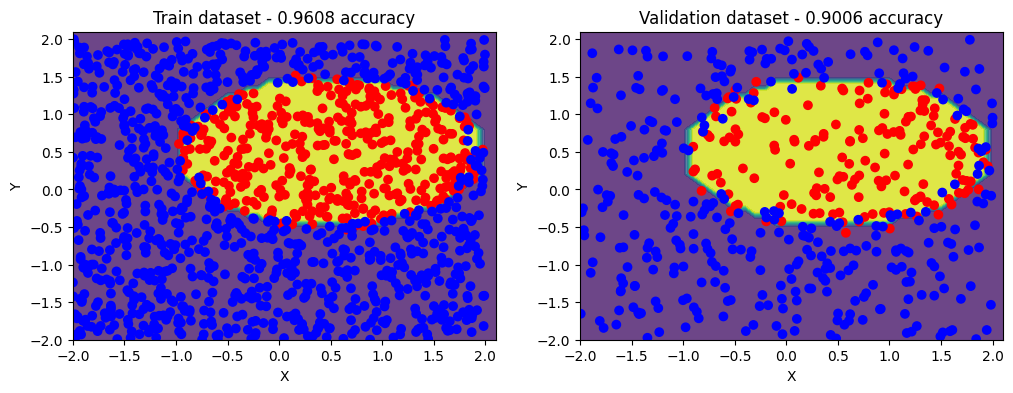

In [ ]:
train_features = new_features  # Assign the transformed features to train_features
train_preds = model.predict(train_features)  # Assign the predictions of train_features to train_preds
train_acc = model.score(train_features, y_train)  # Assign the accuracy score of train_features and y_train to train_acc

val_features = np.column_stack((X_val[:, 0]**2, X_val[:, 1]**2, X_val[:, 0], X_val[:, 1]))  # Create transformed features for validation data
val_preds = model.predict(val_features)  # Assign the predictions of val_features to val_preds
val_acc = model.score(val_features, y_val)  # Assign the accuracy score of val_features and y_val to val_acc

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
data = np.c_[xx.ravel(), yy.ravel()]

new_features = np.column_stack((data[:, 0]**2, data[:, 1]**2, data[:, 0], data[:, 1]))  # Create transformed features for meshgrid data
Z = model.predict(new_features)  # Assign the predictions of new_features using the trained model to Z
Z = Z.reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, Z, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {train_acc:.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, Z, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {val_acc:.4f} accuracy')

plt.show()

You will try also two other kernels:
  - kernel='poly', degree=4, C=10.
  -	kernel='rbf', gamma=1.5, C=10.

Based on those two models, along with the ellipsoid, which model generalizes the best? <br/>
<font color='green'>After running both the poly and rbf kernels, the poly kernel resulted in a validation accuracy of 0.7113, while the rbf kernel resulted in a validation accuracy of 0.8834. This means that the rbf kernel performs better in generalization.</font>

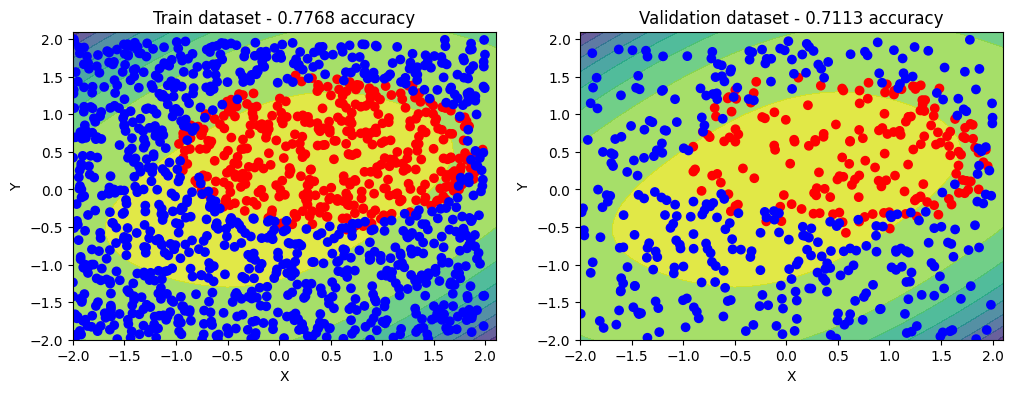

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=4, C=10)
clf = model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]

P = model.decision_function(xy).reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, P, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {clf.score(X_train, y_train):.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, P, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {clf.score(X_val, y_val):.4f} accuracy')

plt.show()

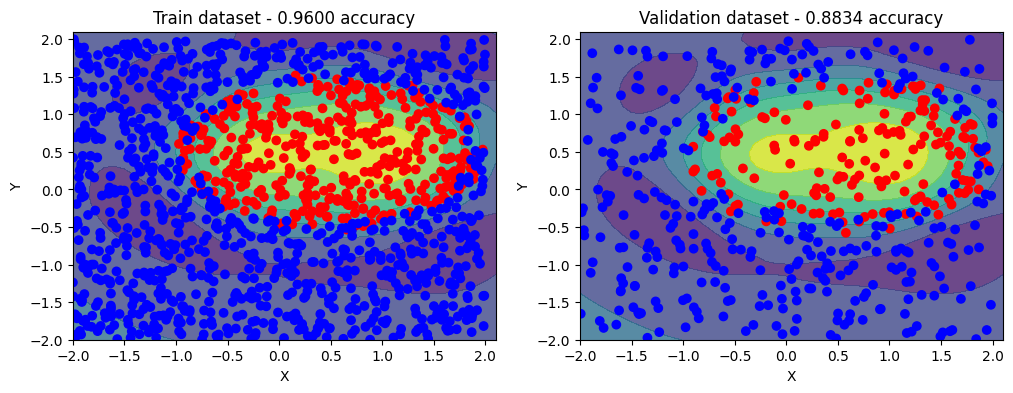

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1.5, C=10)
clf = model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]

P = model.decision_function(xy).reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, P, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {clf.score(X_train, y_train):.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, P, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {clf.score(X_val, y_val):.4f} accuracy')

plt.show()

Use the validation dataset to tune better hyperparameter for rbf (gamma). Use C=10 as before.

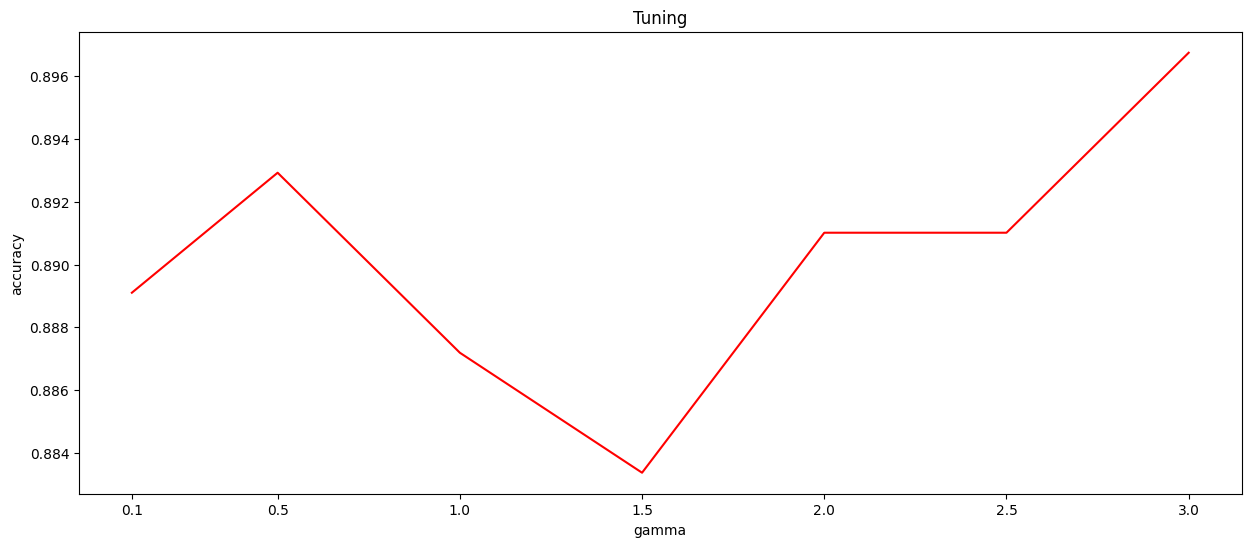

In [ ]:
gammas = [0.1, 0.5, 1, 1.5, 2, 2.5, 3]
accs = []

for gamma in gammas:
    model = SVC(kernel='rbf', gamma=gamma, C=10)
    model.fit(X_train, y_train)
    acc = model.score(X_val, y_val)
    accs.append(acc)

plt.figure(figsize=(15,6))
plt.plot(gammas, accs, color='red')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('Tuning')
plt.xticks(gammas)
plt.show()

Questions:
- Without coding, only from the plot, will the accuracy change using the best $\gamma$ you found? Why?
- Why did we use C=10? <br/>

<font color='green'>Sure, different values lead to different accuracy values. Therefore, theoretically, the accuracy should change for the best $\gamma$ we found.
Regarding why c=10, the idea is to balance and get a reasonable margin while minimizing classification error.</font>

## Question 3 - Perceptron

You will implement perceptron via gradient descent.

The data set is taken from Andrew course on Coursera. The data consists of marks from two exams for 100 applicants and binary labels: 1 when applicant was admitted and 0 otherwise.

The objective is to build a classifier that can predict whether an application will be admitted to the university or not. We <u>will not</u> use test set, but only analyze the training.<br/>

The data is available here: https://sharon.srworkspace.com/ml/datasets/hw2/exams.csv

import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

Load the data, plot it, and make sure you understand its shape.

In [ ]:
data_df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw2/exams.csv',header=None)
print(data_df.head())
print(data_df.shape)

           0          1  2
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1
(100, 3)


Prepare the data by scaling it into 0-1 range (via MinMaxScaler)

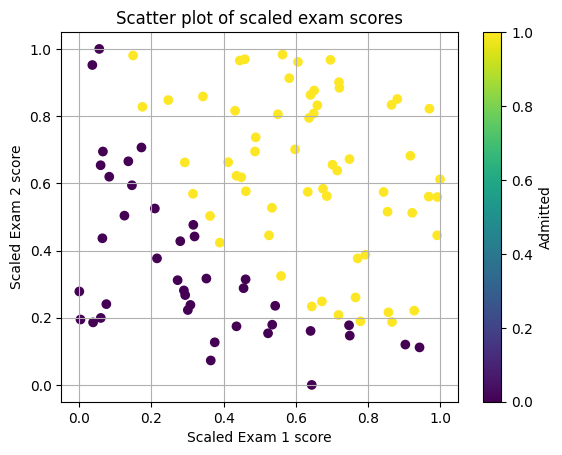

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Separate features (exam scores) and labels
X = data_df.iloc[:, :-1]  # Features (exam scores)
labels = data_df.iloc[:,2]  # Labels
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler to the data and transform the features
X_scaled = scaler.fit_transform(data_df.iloc[:,:2])


# Plot the scaled dataset
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Scaled Exam 1 score')
plt.ylabel('Scaled Exam 2 score')
plt.title('Scatter plot of scaled exam scores')
plt.colorbar(label='Admitted')
plt.grid(True)
plt.show()

Implement the function perceptron(data, labels, lr) which gets the train data along with labels and returns the weight vector learned by perceptron. <br/>
Note: if you choose to use iterations, don’t use more than 10,000 iterations.<br/>



In [ ]:
def perceptron(data, labels, lr=1, max_iter=5000,upgraded=False):
    # Initialize weights with zeros
    data = np.c_[np.ones(data.shape[0]),data]
    print(data[0:5])
    num_samples, num_features = data.shape
    weights = np.zeros(data.shape[1])
    print(data.shape)
    print(weights.shape)
    ws = [weights.copy()]
    # Iterate through data
    for _ in range(max_iter):
        # Iterate through each sample
        for i in range(num_samples):
            # Compute the predicted label
            prediction = np.dot(data[i], weights)
            # Update weights based on prediction error
            if prediction * labels[i] <= 0:
                weights += lr * labels[i] * data[i]
        ws.append(weights.copy())
    if upgraded:
      return ws
    return weights

In [ ]:
def plot(train, labels, w, bias, show=True):
	# Create a figure and axis object
	fig, ax = plt.subplots()

	c0 = train[labels == -1]
	c1 = train[labels == 1]

	# Plot the data
	ax.scatter(c0[:,0], c0[:,1], c='red')
	ax.scatter(c1[:,0], c1[:,1], c='blue')

	a, b, c = w[0], w[1], bias

	# Compute the slope and y-intercept of the line
	m = -a / b
	b = -c / b

	# Generate some x values for the plot
	x = np.arange(np.min(train[:,0]), np.max(train[:,0]), 0.1)

	# Compute the corresponding y values using the equation of the line
	y = m * x + b

	# Plot the line
	plt.plot(x, y)

	# Add axis labels and title
	ax.set_xlabel('X-axis')
	ax.set_ylabel('Y-axis')

	preds = np.sign(np.dot(train, w)+bias)
	acc = np.count_nonzero(labels == preds) / len(labels)

	ax.set_title(f'Train accuracy is {acc}')
	ax.set_xlim(-0.1, 1.1)
	ax.set_ylim(-0.1, 1.1)

	if show:
		plt.show()

Call the perceptron and plot function with your data.

[[1.         0.06542784 0.69465488]
 [1.         0.00326632 0.19470455]
 [1.         0.08296784 0.61961779]
 [1.         0.43176427 0.81600135]
 [1.         0.7019434  0.65539214]]
(100, 3)
(3,)


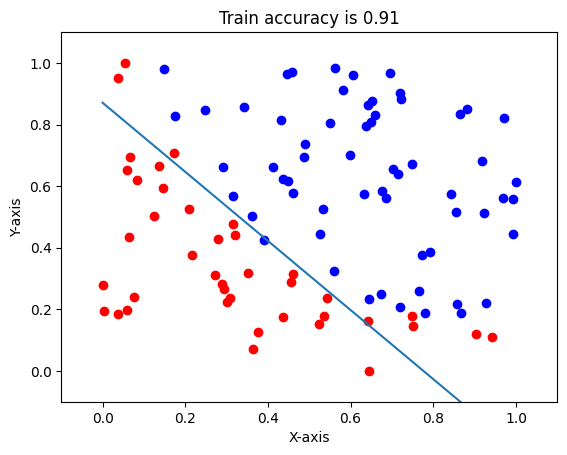

In [ ]:
labels = 2*labels -1
w = perceptron(X_scaled, labels, lr=1000)
bias = w[0]
weights = w[1:]
plot(X_scaled, labels, weights, bias)

Upgrade the "perceptron" function such that it will return array of weight vectors, from each iteration during the process. <br/>
Call the "plot_anim" function and wait untill you see approximate converge <br/>
- Do you really need many iterations?
- Does perceptron converge on this dataset? <br/>

<font color='red'>Write here your answer and explain it</font><br/>
<font color='green'>1. No, after not much iterations the accuracy is stable between 0.91 and 0.92 so there is no need to many iterations.</font><br/>
<font color='green'>2. Considering the improvment occured between the iterations we can say that perceptron converges on the given dataset.</font>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

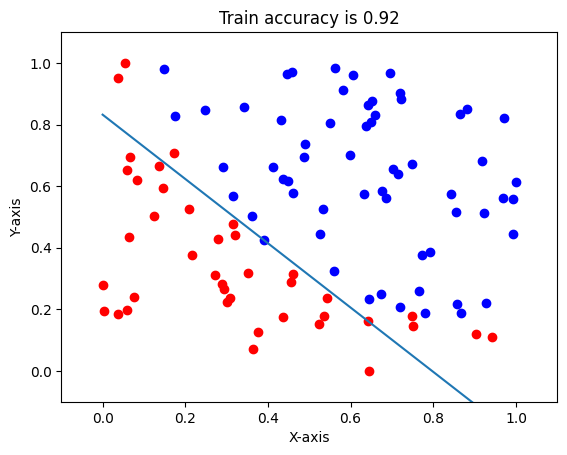

In [ ]:
ws = perceptron(X_scaled, labels, 1000,30,True)    # Implement here
data = X_scaled
def plot_anim(ws):
  for ww in ws:
    plt.clf()
    plot(data, labels, ww[1:], ww[0], False)
    display(plt.gcf())
    clear_output(wait=True)  # Clear the previous plot

plot_anim(ws)

We will extend the theory of convergence in perceptron to non-separable case:
Let ${\{x_i\} }_{i=1}^n$ be the training set and $R$ such that $∀i:‖x_i ‖≤R$.<br/>
The deviation of each sample is defined by $d_i= \max \{0,1-y_i (w^t x_i) \}$. <br/>
Let $D=‖d‖$, then the number of mistakes of the perceptron algorithm is upper bounded by $2(R+D)^2$.<br/>
Use this theorem to find (much) smaller number of iterations, use that exact number as upper bound and <u>report the train accuracy</u>.
Did it improve?<br/>
<font color='red'>Write here your answer and explain it</font>
<br/><font color='green'>The final accuracy didn't changed even after using the giving theorm, So it didn't improved. On the other hand as we can see below the upper bound of itarations improved almost 5 times, our old upper bound was 5000 and the new one - exactly computed is only 1056, which is notable change in num of iterations.</font>


In [ ]:
def perceptron(data, labels, lr=1):
    data = np.c_[np.ones(data.shape[0]),data]
    num_samples, num_features = data.shape
    weights = np.zeros(data.shape[1])
    max_errs = np.linalg.norm(data)
    deviations = np.maximum(0, 1 - labels * np.dot(data, weights))
    deviations_norm = np.linalg.norm(deviations)
    upper_bound = (2 * (max_errs + deviations_norm)**2)
    exact_iterations = int(np.ceil(upper_bound))
    print("Pre calculating upper bound was:")
    print("5000")
    print("Exact number as upper bound of iterations is: ")
    print(exact_iterations)
    ws = []
    for _ in range(exact_iterations):
        for i in range(num_samples):
            prediction = np.dot(data[i], weights)
            if prediction * labels[i] <= 0:
                weights += lr * labels[i] * data[i]
        ws.append(weights.copy())
    return ws

ws = perceptron(X_scaled, labels, lr=0.01)
final_weights = ws[-1]
train_preds = np.sign(np.dot(X_scaled, final_weights[1:]) + final_weights[0])
train_accuracy = np.count_nonzero(labels == train_preds) / len(labels)

print(f"Train accuracy: {round(train_accuracy*100)}%")

Pre calculating upper bound was:
5000
Exact number as upper bound of iterations is: 
1056
Train accuracy: 92%


Remark: actually, $$d_i=\max \{ 0,γ-y_i (w^t x_i ) \}$$ and the bound is $$\left(\frac{R+D}{\gamma}\right)^2$$ where $$γ=\min⁡ \{y_i w^t x_i\}$$
By better measurement of the radius, we can get an even better bound. Its it not required here though.